<a href="https://colab.research.google.com/github/shobhi1998/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#csv file location
path = '/content/drive/MyDrive/Telecom Churn.csv'

In [ ]:
#Reading csv file
df = pd.read_csv(path)

#Getting top 5 rows of dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Getting last 5 rows in dataset
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**Ok, so we can see our dataset has 3333 data and 20 columns. Lets try to understand about the columns we've got here.**




In [ ]:
#check the statistical summary of numerical columns
df.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#creating the copy of dataset so that original folder become save
df = df.copy()

In [ ]:
#Get the name of columns
df.columns


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
# create the categorial columns 
categorial1=df.select_dtypes(include=['object'])
categorial1.head()

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No


In [ ]:
#create for loop to print distinct values from the columns.
for col in categorial1:
   print(f'Distinct values in categorial columns {col} are:{categorial1[col].unique()}')

Distinct values in categorial columns State are:['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Distinct values in categorial columns International plan are:['No' 'Yes']
Distinct values in categorial columns Voice mail plan are:['Yes' 'No']


## **Data Cleaning**

Data cleaning is a crucial stage in any EDA process and takes up the majority of time overall.

The steps below are included in data cleansing:-

 1. Dealing with missing values.
 2. For analysis, some columns may be added or removed.
 3. Convert the column to the correct dtype format.
 4. Duplicate values ​​are removed.


## **Removing duplicates**


In [ ]:
#check null values
df.shape

(3333, 20)

Text(0.5, 1.0, 'duplicate rows in dataset')

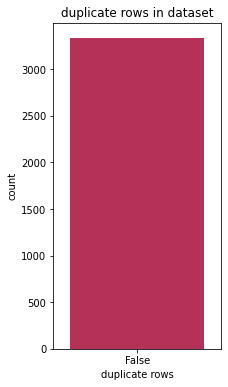

In [ ]:
#duplicate rows 
plt.figure(figsize=(3,6))
sns.countplot(x=df.duplicated(),palette='rocket')
plt.xlabel('duplicate rows')
plt.ylabel('count')
plt.title('duplicate rows in dataset')

In [ ]:
#dropping of the duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Rows and columns 
df.shape

(3333, 20)

In [ ]:
#create dataframe of numerical columns
numerical_df1 = df._get_numeric_data()
numerical_df1.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#create for loop to print unique values in numerical columns
for col in numerical_df1:
  print(f'Unique values in numerical columns {col} are: {numerical_df1[col].unique()[:5]}')

Unique values in numerical columns Account length are: [128 107 137  84  75]
Unique values in numerical columns Area code are: [415 408 510]
Unique values in numerical columns Number vmail messages are: [25 26  0 24 37]
Unique values in numerical columns Total day minutes are: [265.1 161.6 243.4 299.4 166.7]
Unique values in numerical columns Total day calls are: [110 123 114  71 113]
Unique values in numerical columns Total day charge are: [45.07 27.47 41.38 50.9  28.34]
Unique values in numerical columns Total eve minutes are: [197.4 195.5 121.2  61.9 148.3]
Unique values in numerical columns Total eve calls are: [ 99 103 110  88 122]
Unique values in numerical columns Total eve charge are: [16.78 16.62 10.3   5.26 12.61]
Unique values in numerical columns Total night minutes are: [244.7 254.4 162.6 196.9 186.9]
Unique values in numerical columns Total night calls are: [ 91 103 104  89 121]
Unique values in numerical columns Total night charge are: [11.01 11.45  7.32  8.86  8.41]
Uni

In [ ]:
#create correlation matrix
numerical_df1.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


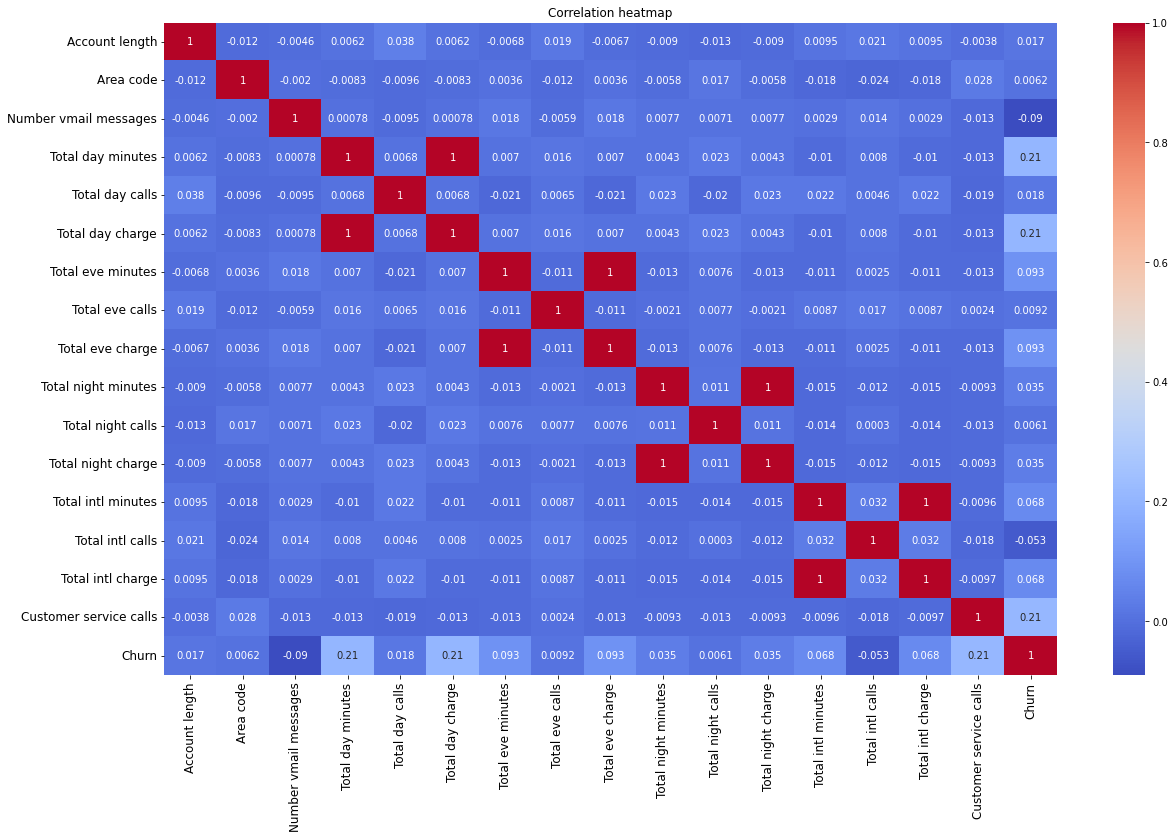

In [ ]:
#create heatmap of above correlation matrix 
plt.figure(figsize=(20,12))
sns.heatmap(numerical_df1.corr(),annot=True,cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation heatmap');

## **Taking Necessary Columns Only**

In [ ]:
# Fetch Columns
new_df = df[['State','Account length', 'Area code','Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes',
             'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls',
             'Total intl charge', 'Customer service calls']]
new_df.head(5)

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


## **1.What can we learn about different State, Account length, Total day charge ?**

In [ ]:
# Fetch State, Account length with Total day charge
hosts_state = df.groupby(['State','Account length'])['Total day charge'].max().reset_index()
hosts_state.sort_values(by='Total day charge', ascending=False).head(5)

,State,Account length,Total day charge
279,CO,154,59.64
1757,NY,64,58.96
1842,OH,115,58.70
1825,OH,83,57.36
1242,MO,112,57.04


## **2.What can we learn about different State, Account length, Total eve charge ?**

In [ ]:
# Fetch State, Account length with Total eve charge
hosts_state = df.groupby(['State','Account length'])['Total eve charge'].max().reset_index()
hosts_state.sort_values(by='Total eve charge', ascending=False).head(5)

,State,Account length,Total eve charge
1418,NC,130,30.91
726,IN,46,30.75
1005,MD,102,30.11
904,LA,117,29.89
131,AR,99,29.83


## **3.What can we learn about different State, Account length, Total night charge ?**

In [ ]:
# Fetch State, Account length with Total night charge
hosts_state = df.groupby(['State','Account length'])['Total night charge'].max().reset_index()
hosts_state.sort_values(by='Total night charge', ascending=False).head(5)

,State,Account length,Total night charge
2375,VA,172,17.77
1506,NE,89,17.19
625,ID,55,16.99
147,AR,153,16.55
508,GA,73,16.42


### **4.What can we learn about different State, Account length, Total intl charge ?**

In [ ]:
# Fetch State, Account length with Total intl charge
hosts_state = df.groupby(['State','Account length'])['Total intl charge'].max().reset_index()
hosts_state.sort_values(by='Total intl charge', ascending=False).head(5)

,State,Account length,Total intl charge
1042,ME,36,5.40
659,ID,128,5.10
1924,OR,53,4.97
660,ID,130,4.94
1535,NE,194,4.91


## **2. What can we learn from predictions?**

In [ ]:
# Fetch State with Total day charge
hosts_state = df.groupby(['State'])['Total day charge'].max().reset_index()
hosts_state.sort_values(by='Total day charge', ascending=False).head(5)

,State,Total day charge
5,CO,59.64
34,NY,58.96
35,OH,58.70
24,MO,57.04
8,DE,56.83


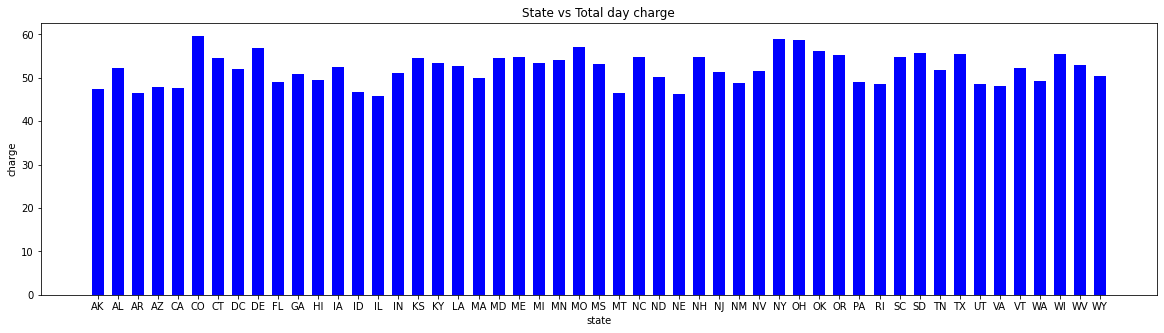

In [ ]:
#Plot the bar graph
state = hosts_state['State']
charge = hosts_state['Total day charge']

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='blue',
        width = 0.6)
 
plt.xlabel("state")
plt.ylabel("charge")
plt.title("State vs Total day charge")
plt.show()

### **Fetch State with Total eve charge**

In [ ]:
# Fetch State with Total eve charge
hosts_state = df.groupby(['State'])['Total eve charge'].max().reset_index()
hosts_state.sort_values(by='Total eve charge', ascending=False).head(5)

,State,Total eve charge
27,NC,30.91
15,IN,30.75
20,MD,30.11
18,LA,29.89
2,AR,29.83


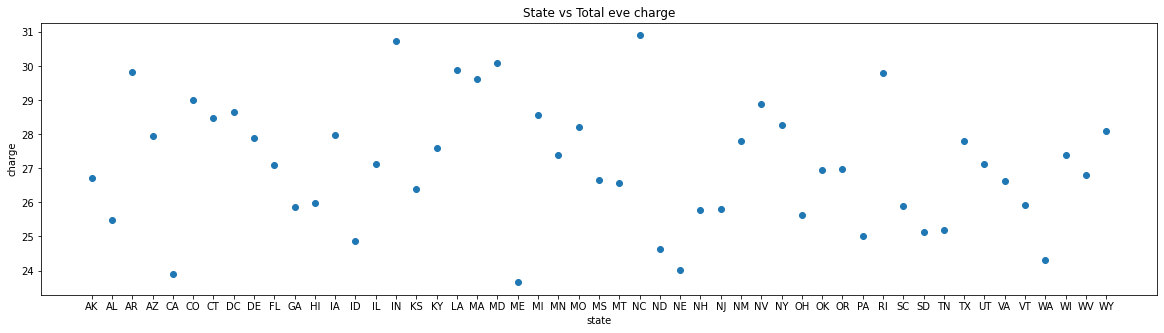

In [ ]:
#Plot the bar graph
state = hosts_state['State']
charge = hosts_state['Total eve charge']

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.scatter(state, charge)
 
plt.xlabel("state")
plt.ylabel("charge")
plt.title("State vs Total eve charge")
plt.show()

## **States that are high numbers of night calls charges**

In [ ]:
# Fetch The busiest  at night
night_user = df.groupby(['State','Total night minutes','Total night calls'])['Total night charge'].max().reset_index()
night_user = night_user.sort_values(by='Total night charge', ascending=False).head(10)
night_user

,State,Total night minutes,Total night calls,Total night charge
2932,VA,395.0,72,17.77
1876,NE,381.9,147,17.19
826,ID,377.5,114,16.99
186,AR,367.7,89,16.55
656,GA,364.9,106,16.42
3149,WI,364.3,106,16.39
2931,VA,354.9,75,15.97
2289,OH,352.5,111,15.86
1135,LA,352.2,95,15.85
955,IN,350.2,108,15.76


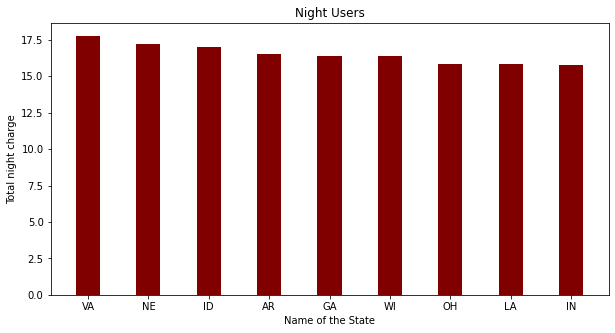

In [ ]:
#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total night charge")
plt.title("Night Users")
plt.show()

## **Most Night User States are :**

  **1. VA** <br>
  **2. NE** <br>
  **3. ID** <br>
  **4. AR** <br>
  **5. GA** <br>
  <br>These are the states who is having most night calls.

## **State of users who having problem with services**

In [ ]:
# Getting the state with customer service calls
problem_areas = df.groupby(['State','Area code'])['Customer service calls'].count().reset_index()
problem_areas = problem_areas.sort_values(by='Customer service calls', ascending=False).head(8)
problem_areas

,State,Area code,Customer service calls
148,WV,415,52
103,NY,415,47
112,OR,415,44
40,ID,415,41
151,WY,415,41
70,MN,415,40
106,OH,415,40
4,AL,415,40


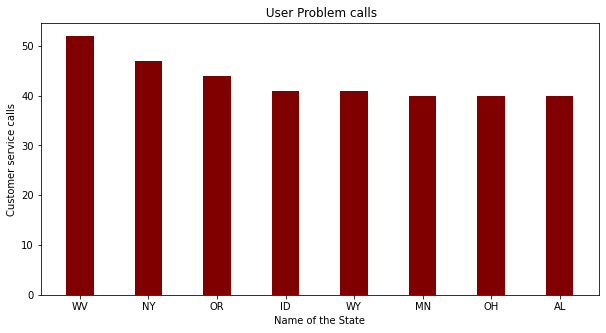

In [ ]:
#create the bar graph
state = problem_areas['State']
problem = problem_areas['Customer service calls']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(state, problem, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Customer service calls")
plt.title(" User Problem calls")
plt.show()

## **Prefrence to have voice mail plan or not**





In [ ]:
# Getting the details of voice mail plan

df.user_prefrence = df['Voice mail plan'].value_counts()
df.user_prefrence

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


No     2411
Yes     922
Name: Voice mail plan, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


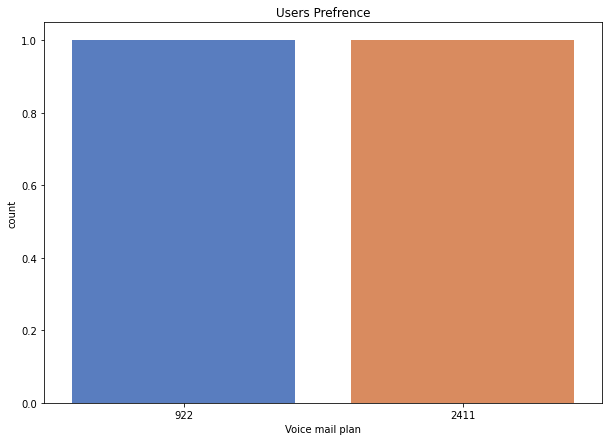

In [ ]:
# create the bar graph
plt.figure(figsize=(10,7))
plt.title("Users Prefrence")
sns.countplot(df.user_prefrence, palette="muted")
fig = plt.gcf()
plt.show()

## **Cutomer who calls customer care and they Churn**

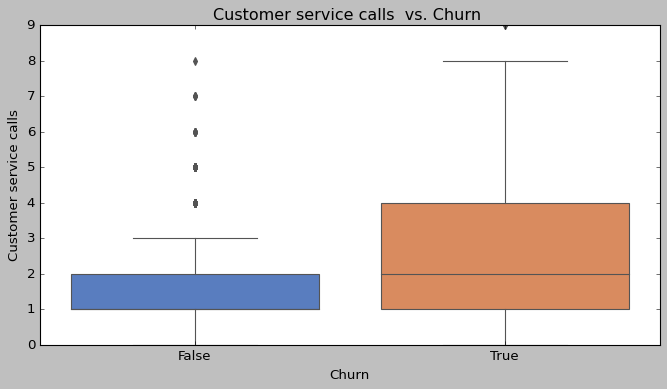

In [40]:
# Create the Box Plot
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.title("Customer service calls  vs. Churn ")
sns.boxplot(data=df, x='Churn',y='Customer service calls',palette="muted")
plt.show()


The above observation Shows that customers are having problems with the services and they called customer care multiple times.<br>
<br>Customer who called customer care 2 or more than 2 times have highest rate of churn.